In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [46]:
# Import Problem 2 code
T = 1
h = 0.1
n = int(T/h) + 1

A = np.array([[0, 1], [-1, 0]])
Ak = np.array([[1, h],[-h, 1]])
Ck = np.array([1, 0]) # z = x
x0 = np.array([1, 1])

x_var = 0.1
z_var = 0.1
Q = np.array([[x_var, 0], [0, x_var]])
R = z_var

x_real = np.zeros((n, 2))
x_real[0] = x0
for i in range(1, n):
    x_real[i] = x_real[i-1] + h * A @ x_real[i-1]

x_pred = np.zeros((n, 2))
Cov_pred = np.zeros((n, 2, 2))

x_pred[0] = x0
Cov_pred[0] = Q

x_filt = np.zeros((n, 2))
Cov_filt = np.zeros((n, 2, 2))

x_filt[0] = x0
Cov_filt[0] = Q

z = np.zeros(n)
z[0] = Ck @ x0 + R * np.random.normal()


# Kalman Filter
for i in range(1, n):
    x_pred[i] = Ak @ x_pred[i-1]
    Cov_pred[i] = Ak @ Cov_pred[i-1] @ Ak.T + Q

    z[i] = Ck @ x_real[i] + R * np.random.normal()

    K = Cov_pred[i] @ Ck.T * 1/(Ck @ Cov_pred[i] @ Ck.T + R)
    x_filt[i] = x_pred[i] + K * (z[i] - Ck @ x_pred[i])
    Cov_filt[i] = Cov_pred[i] - K * Ck @ Cov_pred[i]

In [47]:
x_fnear = np.zeros((10, n, 2))
C_fnear = np.zeros((10, n, 2, 2))

x_fnear_f = np.zeros((10, n, 2))
C_fnear_f = np.zeros((10, n, 2, 2))

x_fnear[:, 0] = x0
C_fnear[:, 0] = Q
x_fnear_f[:, 0] = x0
C_fnear_f[:, 0] = Q

for f in range(10):
    for i in range(n):
        x_fnear[f, i] = Ak @ x_fnear[f, i-1]
        C_fnear[f, i] = Ak @ C_fnear[f, i-1] @ Ak.T + Q

        z[i] = Ck @ x_real[i] + R * np.random.normal()

        K = C_fnear[f, i] @ Ck.T * 1/(Ck @ C_fnear[f, i] @ Ck.T + R) + 0.1*(1+f)
        x_fnear_f[f, i] = x_fnear[f, i] + K * (z[i] - Ck @ x_fnear[f, i])
        C_fnear_f[f, i] = C_fnear[f, i] - K * Ck @ C_fnear[f, i]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


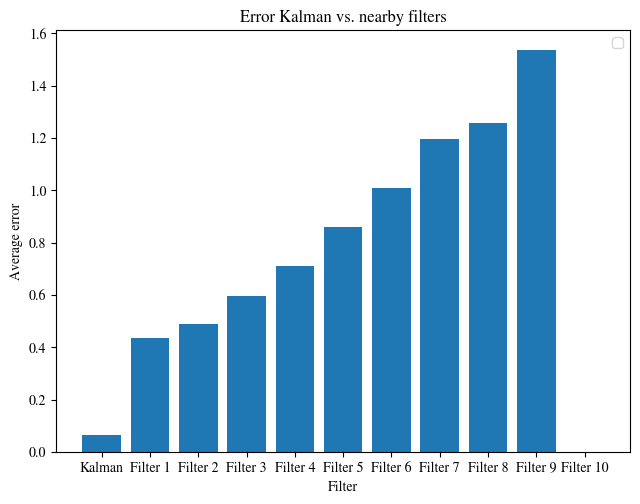

In [48]:
fig, ax = plt.subplots()
fig.tight_layout()

# a bar plot displaying the average error between the real trajectory and the filtered trajectory
e_filters = np.zeros(11)

e_filters[0] = np.mean([np.linalg.norm(x_real[i] - x_filt[i]) for i in range(n)])
for f in range(1, 10):
    e_filters[f] = np.mean([np.linalg.norm(x_real[i] - x_fnear_f[f, i]) for i in range(n)])

x_axis = ['Kalman', 'Filter 1', 'Filter 2', 'Filter 3', 'Filter 4', 'Filter 5', 'Filter 6', 'Filter 7', 'Filter 8', 'Filter 9', 'Filter 10']
ax.bar(x_axis, e_filters)

ax.set_xlabel('Filter')
ax.set_ylabel('Average error')
ax.set_title('Error Kalman vs. nearby filters')
ax.legend()
#plt.savefig('HW3_3_error.png', dpi=300)
plt.show()